# Yolo5 커스텀 데이터 학습
---

## 데이터 준비

In [ ]:
!curl -L "https://public.roboflow.com/ds/HugKI6C5By?key=KUBtiR1rwg" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [4]:
%cd /content

/content


In [5]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 14944, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 14944 (delta 2), reused 1 (delta 0), pack-reused 14936
Receiving objects: 100% (14944/14944), 13.99 MiB | 30.54 MiB/s, done.
Resolving deltas: 100% (10269/10269), done.


In [6]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!pip install -r requirements.txt

In [8]:
%cd /

/


In [10]:
from glob import glob

img_list = glob('/content/dataset/export/images/*.jpg')
len(img_list)

196

In [13]:
from sklearn.model_selection import train_test_split

train_img, val_img = train_test_split(img_list,
                                      test_size = 0.2)
len(train_img), len(val_img)

(156, 40)

In [14]:
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img) + '\n')

In [15]:
with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(val_img) + '\n')

In [18]:
# yaml 수정
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.load(f, Loader=yaml.FullLoader)
  
data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml', 'w') as f:
  data = yaml.dump(data, f)

## 학습

In [19]:
%cd /content/yolov5

/content/yolov5


In [20]:
!python train.py --img 416 --batch 16 --epoch 50 --data /content/dataset/data.yaml --cfg /content/yolov5/models/yolov5s.yaml --weight yolov5s.pt --name racoon_yolov5s

train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=racoon_yolov5s, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anc

# Detaction

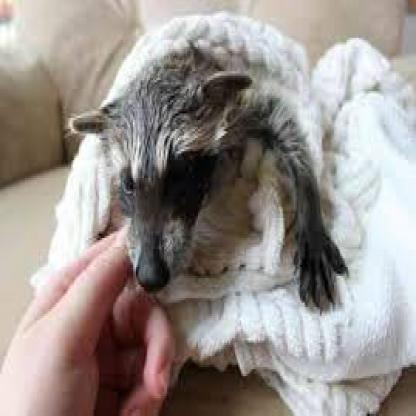

In [36]:
from IPython.display import Image
import os

val_img_path = val_img[1]

Image(val_img[1])

In [38]:
!python detect.py --weights /content/yolov5/runs/train/racoon_yolov5s/weights/best.pt --save-txt --img 416 --conf 0.5 --source {val_img_path}
# 바운딩박스 좌표 확인 가능

detect: weights=['/content/yolov5/runs/train/racoon_yolov5s/weights/best.pt'], source=/content/dataset/export/images/raccoon-106_jpg.rf.UCuMtEoBFF5lvbYSErKC.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/export/images/raccoon-106_jpg.rf.UCuMtEoBFF5lvbYSErKC.jpg: 416x416 1 raccoon, 8.1ms
Speed: 0.4ms pre-process, 8.1ms inference, 1.7ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
1 labels saved to runs/detect/ex